# Image Processing SS 18 - Assignment - 04

### Deadline is 16.5.2016 at 8:00 o'clock

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.
Please strip the output from the cells, either select `Cell` -> `All Output` -> `Clear` or use the `nb_strip_output.py` script / git hook.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2

import random
try:
    from StringIO import StringIO as BytesIO
except ImportError:
    from io import BytesIO
    
from PIL import Image

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

# Exercise 1 - Qualify sharpness and noise - 5 Points

Qualify the noise and sharpness in the images. Make a plot images, noise

Please download sample picture from [here](http://sipi.usc.edu/database/misc.zip)

In [3]:
# Load the pictures here
sample_images = []
direc = 'misc/' # directory of the sample pictures realtivly to your notebook
for number in [1,3,5,6]:
    sample_images.append(
        np.array(Image.open(direc+'4.2.0'+str(number)+'.tiff'))
    )
for name in ['house']:
    sample_images.append(
        np.array(Image.open(direc+name+'.tiff'))
    )

<Container object of 5 artists>

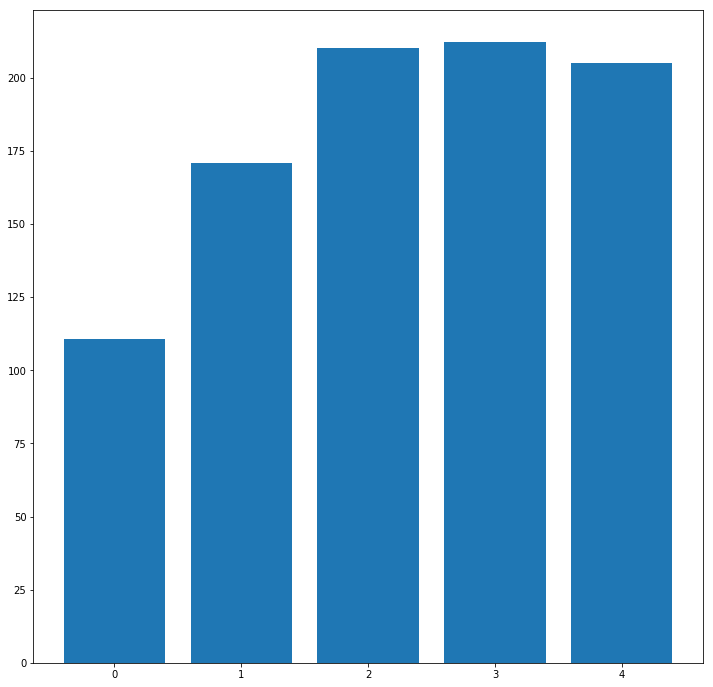

In [81]:
def qualify_noise(img_input):
    """Qualify the noise based on the std of a gaussian model.
       You may find a window that is contant in the images.
    """
    # your code here
    
    # convert to more simple image intensities model
    def rgb2gray(rgb):
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    
    img = rgb2gray(img_input).astype(np.uint8)
    
    # At first we want to find a small homogeneous patch of image
    patch_shape = (50,50)
    min_set_patch = 100000
    patch_coord = (0,0)
    
    for i in range(0, len(img) - patch_shape[0], patch_shape[0]):
        for j in range(0, len(img[0]) - patch_shape[1], patch_shape[1]):
            unique_intensities = len(np.unique(img[i:i + patch_shape[0],j:j + patch_shape[1]]))
            if min_set_patch > unique_intensities:
                min_set_patch = unique_intensities
                patch_coord = i,j
    
    patch = img[patch_coord[0]:patch_coord[0] + patch_shape[0], patch_coord[1]:patch_coord[1] + patch_shape[1]]
    
    # Next step --> compute gaussian parameters: mu and sigma
    mu = np.sum(patch)/(patch.shape[0] * patch.shape[1])
    
    sigma = np.sqrt(np.sum(np.multiply(patch - mu, patch - mu))/(patch.shape[0] * patch.shape[1]))
    
    return mu #, sigma

plt.bar(range(len(sample_images)), [qualify_noise(i) for i in sample_images])

<Container object of 5 artists>

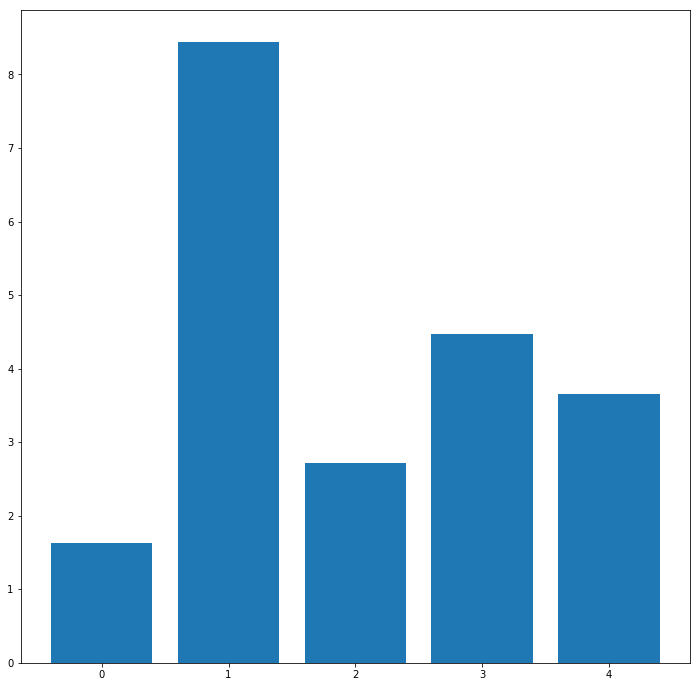

In [51]:

def qualify_sharpness(img_input):
    """Qualify the sharpness based on the average pixel differences."""
    # your code here
    
    # convert to more simple image intensities model
    def rgb2gray(rgb):
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

    img = rgb2gray(img_input)
    
    # Here we find differences in x and y directions
    img_shift_x = np.zeros(img.shape)
    img_shift_x[:,1:] = img[:,:-1]
    img_shift_x = img - img_shift_x
    img_shift_x = np.clip(img_shift_x, 0, None)
    
    img_shift_y = np.zeros(img.shape)
    img_shift_y[1:,:] = img[:-1,:]
    img_shift_y = img - img_shift_y
    img_shift_y = np.clip(img_shift_y, 0, None)
    
    
    img_xy = img_shift_x/2 + img_shift_y/2
    
    img_xy = img_xy.astype(np.uint8)
    
    # Calculating our sharpness coefficient
    sharpness_coef = np.sum(img_xy)/(img_xy.shape[0] * img_xy.shape[1])
    
    return sharpness_coef

plt.bar(range(len(sample_images)), [qualify_sharpness(i) for i in sample_images])

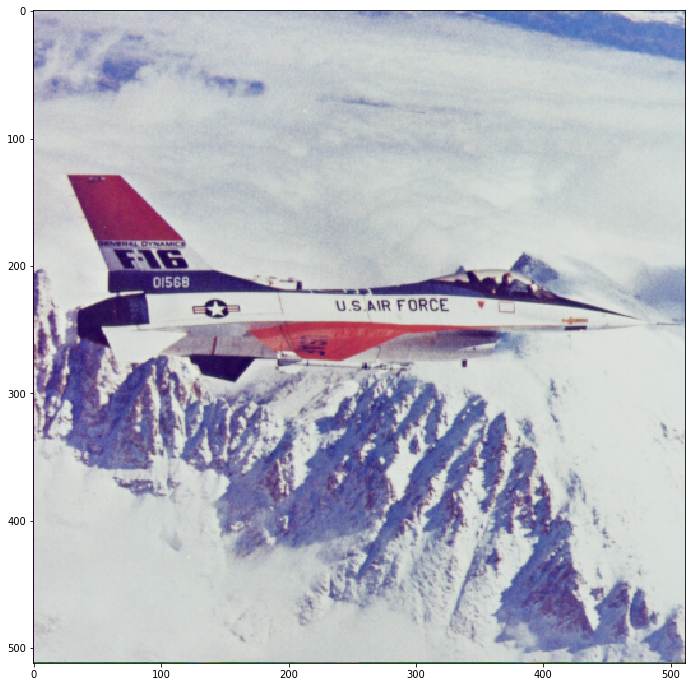

In [53]:
plt.imshow(sample_images[2])

Does the result match the expectations? If not what processing step can be done?/

# Exercise 2 - SSIM JPEG Compression - 5 Points

In [ ]:
def jpeg_enocde(img, quality):
    pil_img = Image.fromarray(img)
    buffer = BytesIO()
    pil_img.save(buffer, "JPEG", quality=quality)
    return buffer

def jpeg_decode(buffer):
    img = Image.open(buffer)
    return np.array(img)

def jpeg_quality_filter(img, quality):
    as_jpeg = jpeg_enocde(img, quality)
    return jpeg_decode(as_jpeg)

In [ ]:
images_for_jpeg = sample_images[2::]
len(images_for_jpeg)

In [ ]:
images10 = [jpeg_quality_filter(img, 10) for img in images_for_jpeg]
images50 = [jpeg_quality_filter(img, 10) for img in images_for_jpeg]
images80 = [jpeg_quality_filter(img, 10) for img in images_for_jpeg]

In [ ]:
def ssim(img, filtered_img):
    """The SSIM similarity measure. Use the parameters from the paper 
    as on the second to last slide from the lecture"""
    # your code
    return random.randint(0, 10)

for i, img in enumerate(images_for_jpeg):
    print(i)
    compressed_images = [images10[i], images50[i], images80[i]]
    plt.bar(range(len(compressed_images)),
             [ssim(img, comp) for comp in compressed_images])
    plt.show()